Please reference the Question 3 section below for further explanation of steps taken to create the visualization

In [4]:
# Required Imports
import os, json, time
from pyproj import Transformer, Geod    
from wildfire.Reader import Reader as WFReader
import geojson
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
with open('intermediate_file_paths.json') as output_path_file:
    output_paths = json.load(output_path_file)

SI_PER_FIRE_INPUT_PATH = output_paths.get('stage1_si_per_fire_csv')
SI_PER_YEAR_INPUT_PATH = output_paths.get('stage1_si_per_year_csv')
EPA_AQI_PER_YEAR_INPUT_PATH = output_paths.get('stage1_epa_aqi_per_year_csv')
FIRE_INPUT_PATH = output_paths.get('stage0_fire_json')


SCALED_SI_PER_YEAR_OUTPUT_PATH = output_paths.get('stage2_scaled_si_per_year_csv')

## Question 1

In [ ]:
with open(FIRE_INPUT_PATH) as fire_file:
    fire_data_for_hist = geojson.load(fire_file)

In [ ]:
fire_distances = []

for feature in fire_data_for_hist['features']:

    dist_from_memphis = feature.get('attributes', {}).get('distance')
    fire_distances.append(dist_from_memphis)

In [ ]:
# Convert fire_distances to a DataFrame for easier analysis and plotting
distances_df = pd.DataFrame(fire_distances, columns=['distance_miles'])

# Calculate summary statistics
distance_summary = distances_df['distance_miles'].describe()
print("Distance Summary Statistics:")
print(distance_summary)

Distance Summary Statistics:
count    101906.000000
mean       1059.860947
std         526.912300
min           5.992876
25%         572.452124
50%        1127.416618
75%        1561.397625
max        1799.999235
Name: distance_miles, dtype: float64


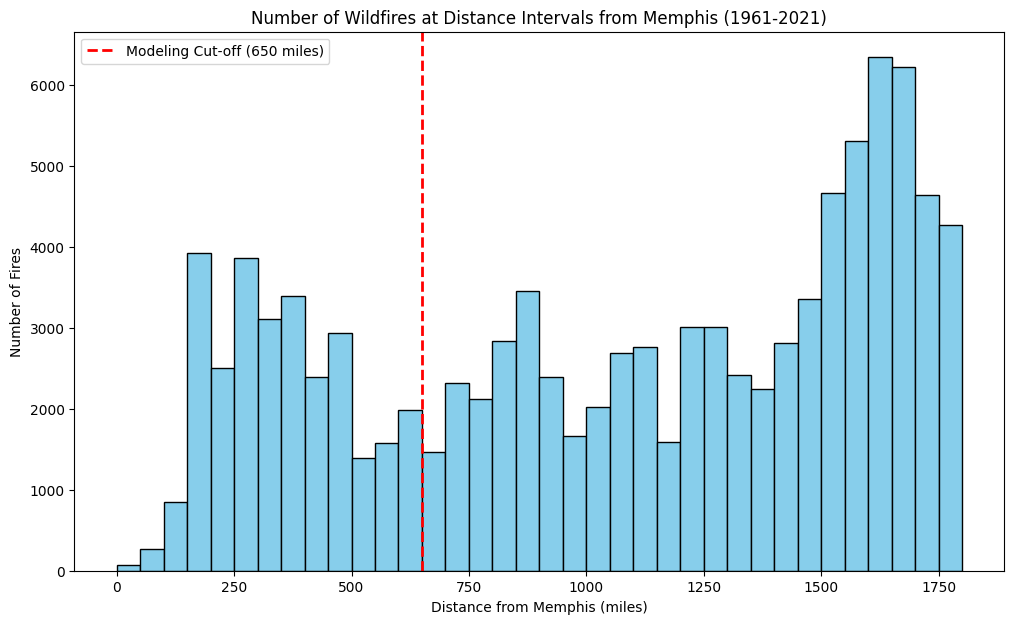

In [ ]:
# Define the bin edges for every 50-mile interval up to 1800 miles
bins = list(range(0, 1801, 50))  # Creates bins: 0-50, 50-100, ..., up to 1750-1800

# Set the distance cut-off for modeling (replace with your specific cut-off if different)
modeling_distance_cutoff = 650

# Plot the histogram
plt.figure(figsize=(12, 7))
plt.hist(fire_distances, bins=bins, color='skyblue', edgecolor='black')
plt.axvline(x=modeling_distance_cutoff, color='red', linestyle='--', linewidth=2, label=f'Modeling Cut-off ({modeling_distance_cutoff} miles)')
plt.xlabel('Distance from Memphis (miles)')
plt.ylabel('Number of Fires')
plt.title('Number of Wildfires at Distance Intervals from Memphis (1961-2021)')
plt.legend()
plt.show()

## Question 2

In [6]:
per_year_df = pd.read_csv(SI_PER_YEAR_INPUT_PATH)

In [ ]:
# Display the column headers and basic information for the politician dataset
print("\nPer Year Smoke Imact + Acres Burned - Column Headers:")
print(per_year_df.columns)

print("\nPer Year Smoke Imact + Acres Burned - Basic Info:")
print(per_year_df.info())

print("\nPer Year Smoke Imact + Acres Burned - First 5 Rows:")
print(per_year_df.head())


Per Year Smoke Imact + Acres Burned - Column Headers:
Index(['fire_year', 'total_amortized_smoke_impact', 'total_fire_duration',
       'total_acres_burned', 'avg_daily_smoke_impact'],
      dtype='object')

Per Year Smoke Imact + Acres Burned - Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   fire_year                     57 non-null     int64  
 1   total_amortized_smoke_impact  57 non-null     float64
 2   total_fire_duration           57 non-null     float64
 3   total_acres_burned            57 non-null     float64
 4   avg_daily_smoke_impact        57 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 2.4 KB
None

Per Year Smoke Imact + Acres Burned - First 5 Rows:
   fire_year  total_amortized_smoke_impact  total_fire_duration  \
0       1964                  7.432192e-07         

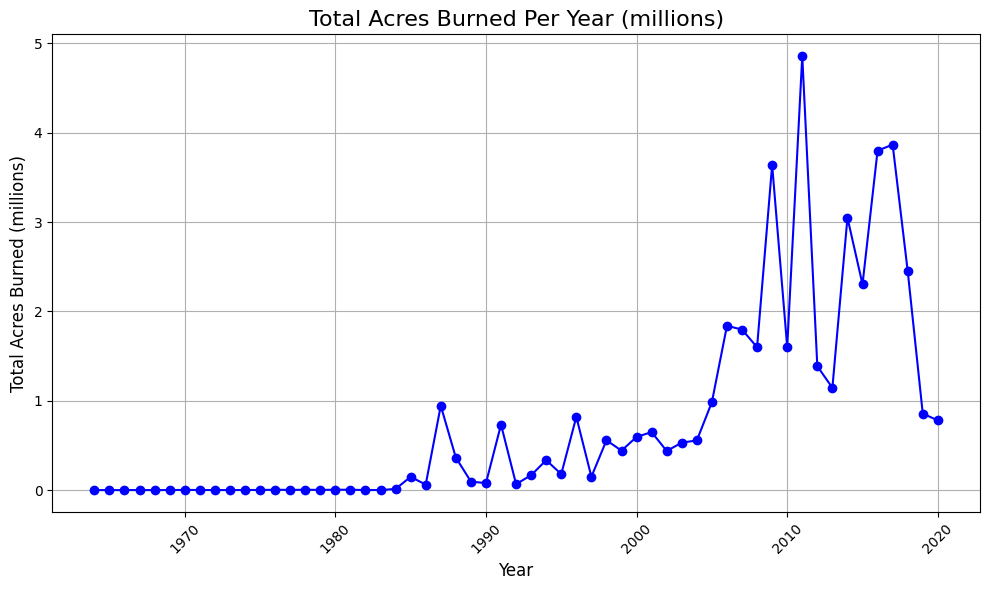

In [7]:
# Convert total acres burned to millions
per_year_df['total_acres_burned_millions'] = per_year_df['total_acres_burned'] / 1e6


# Plotting the time series of total acres burned per year in millions
plt.figure(figsize=(10, 6))

# Plot total acres burned (in millions) against the year
plt.plot(per_year_df['fire_year'], per_year_df['total_acres_burned_millions'], marker='o', linestyle='-', color='b')

# Adding title and labels
plt.title('Total Acres Burned Per Year (millions)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Acres Burned (millions)', fontsize=12)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()


## Chart for Presentation

/var/folders/js/_m5r698x29j4dvr0w18h6jdm0000gn/T/ipykernel_89160/2101702916.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['total_acres_burned_millions'] = filtered_df['total_acres_burned'] / 1e6


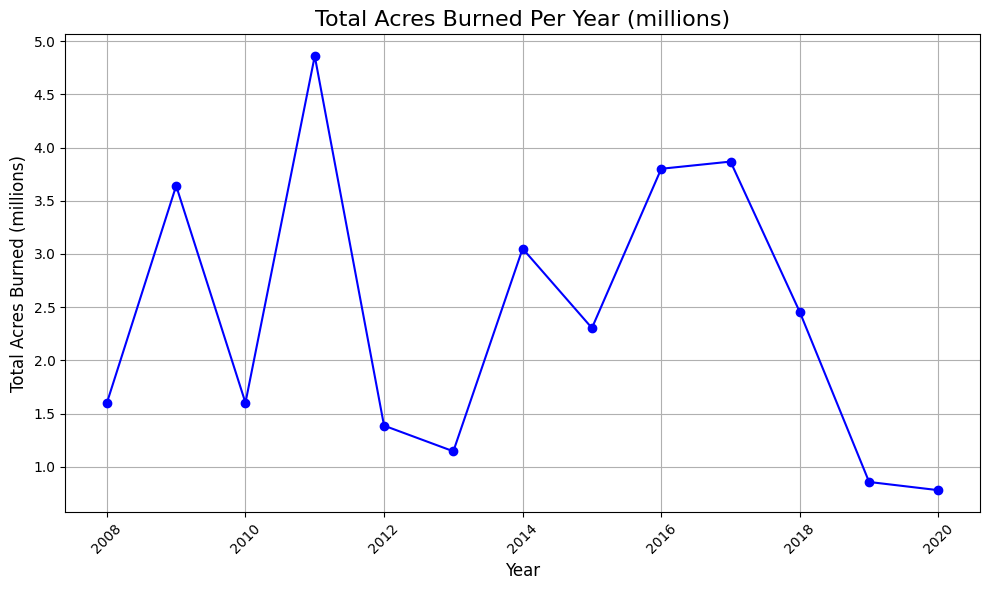

In [8]:
# Filter the DataFrame to include only rows where 'fire_year' is between 2008 and 2020 (inclusive)
filtered_df = per_year_df[(per_year_df['fire_year'] >= 2008) & (per_year_df['fire_year'] <= 2020)]

# Convert total acres burned to millions for the filtered data
filtered_df['total_acres_burned_millions'] = filtered_df['total_acres_burned'] / 1e6

# Plotting the time series of total acres burned per year in millions
plt.figure(figsize=(10, 6))

# Plot total acres burned (in millions) against the year for the filtered data
plt.plot(filtered_df['fire_year'], filtered_df['total_acres_burned_millions'], marker='o', linestyle='-', color='b')

# Adding title and labels
plt.title('Total Acres Burned Per Year (millions)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Acres Burned (millions)', fontsize=12)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()


## Question 3

## Visualization of Smoke Impact vs. AQI (Question 3)

In this section, I compare the yearly average daily smoke impact to the AQI values for the fire season. To ensure an apples-to-apples comparison, I used data from the **Stage 1 Fire Processing** notebook, which calculates the average daily smoke impact per year. By focusing on annual averages, the comparison reflects the relative contribution of smoke from wildfires alongside AQI values, both over a comparable period and in similar units.

To bring the smoke impact values onto a similar scale as the AQI values, I applied a **scaling factor of 10,000,000**. This factor was determined after experimenting with the visualization to align the smoke impact values within the AQI's range. The scaled smoke impact values and AQI data are then plotted in a time series, allowing for a clearer visual assessment of how smoke from wildfires may relate to changes in air quality over time.


In [ ]:
epa_aqi_df = pd.read_csv(EPA_AQI_PER_YEAR_INPUT_PATH)

print(epa_aqi_df.head(5))

   year  pollutant_number   pollutant_name  average_aqi_fire_season
0  1967             42401   Sulfur dioxide                58.569767
1  1968             42401   Sulfur dioxide                54.542857
2  1969             42401   Sulfur dioxide                53.141414
3  1970             42401   Sulfur dioxide                74.184932
4  1971             42101  Carbon monoxide                39.266667


In [ ]:
annual_aqi_per_year_df = epa_aqi_df.groupby('year', as_index=False)['average_aqi_fire_season'].mean()

In [ ]:
si_per_year_df = pd.read_csv(SI_PER_YEAR_INPUT_PATH)

print(si_per_year_df.columns)

Index(['fire_year', 'total_amortized_smoke_impact', 'total_fire_duration',
       'total_acres_burned', 'avg_daily_smoke_impact'],
      dtype='object')


In [ ]:
scaling_factor = 10000000

# Apply scaling to bring avg_daily_smoke_impact to a 0-500 range
si_per_year_df['scaled_avg_daily_smoke_impact'] = (
    si_per_year_df['avg_daily_smoke_impact'] * scaling_factor
)

# Display the results
print(si_per_year_df[['fire_year', 'avg_daily_smoke_impact', 'scaled_avg_daily_smoke_impact']].head(5))

   fire_year  avg_daily_smoke_impact  scaled_avg_daily_smoke_impact
0       1964            7.430301e-08                       0.743030
1       1965            3.939202e-08                       0.393920
2       1966            3.440880e-08                       0.344088
3       1967            5.019618e-07                       5.019618
4       1968            3.645253e-08                       0.364525


In [ ]:
all_years = pd.DataFrame({'year': range(2021 - 60, 2022)})

# Fill in missing years with 0 values, focusing only on the necessary columns
si_per_year_df = all_years.merge(si_per_year_df, how='left', left_on='year', right_on='fire_year').fillna({'scaled_smoke_impact': 0})
annual_aqi_per_year_df = all_years.merge(annual_aqi_per_year_df, how='left', on='year').fillna({'average_aqi_fire_season': 0})

# Get the number of records after the merge
yearly_smoke_impact_count = len(si_per_year_df )
annual_aqi_per_year_count = len(annual_aqi_per_year_df)
all_years_count = len(all_years)

print(f"Number of records in yearly_smoke_impact_df after merge: {yearly_smoke_impact_count}")
print(f"Number of records in annual_aqi_per_year_df after merge: {annual_aqi_per_year_count}")
print(f"Number of records in all_years after merge: {all_years_count }")

Number of records in yearly_smoke_impact_df after merge: 61
Number of records in annual_aqi_per_year_df after merge: 61
Number of records in all_years after merge: 61


In [ ]:
# Save per-year data to CSV
si_per_year_df.to_csv(SCALED_SI_PER_YEAR_OUTPUT_PATH, index=False)

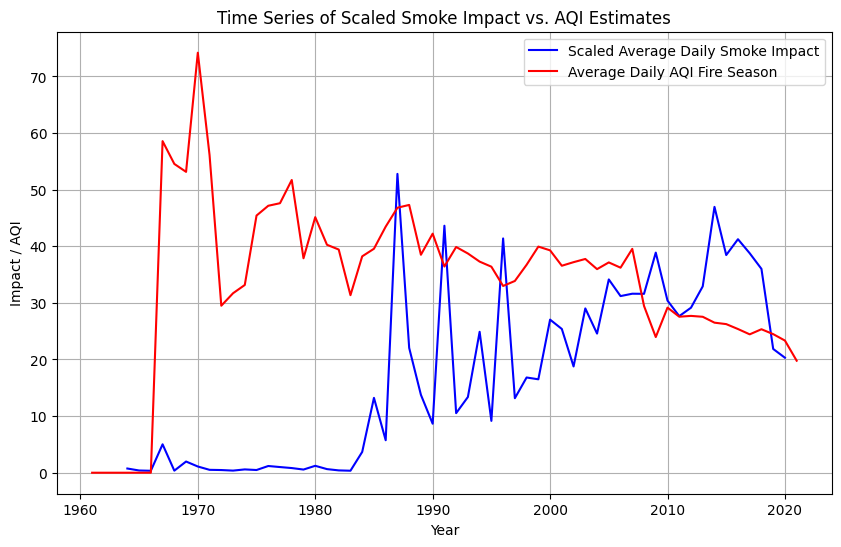

In [ ]:
# Plotting the time series comparison
plt.figure(figsize=(10, 6))
plt.plot(si_per_year_df['fire_year'], si_per_year_df['scaled_avg_daily_smoke_impact'], label='Scaled Average Daily Smoke Impact', color='blue')
plt.plot(annual_aqi_per_year_df['year'], annual_aqi_per_year_df['average_aqi_fire_season'], label='Average Daily AQI Fire Season', color='red')
plt.xlabel('Year')
plt.ylabel('Impact / AQI')
plt.title('Time Series of Scaled Smoke Impact vs. AQI Estimates')
plt.legend()
plt.grid(True)
plt.show()

### Additional Graphs

In [ ]:
si_per_fire_df = pd.read_csv(SI_PER_FIRE_INPUT_PATH)
print(si_per_fire_df.columns)

Index(['OBJECTID', 'USGS_Assigned_ID', 'Assigned_Fire_Type', 'fire_year',
       'Fire_Polygon_Tier', 'Fire_Attribute_Tiers', 'total_acres_burned',
       'GIS_Hectares', 'Source_Datasets', 'Listed_Fire_Types',
       'Listed_Fire_Names', 'Listed_Fire_Codes', 'Listed_Fire_IDs',
       'Listed_Fire_IRWIN_IDs', 'Listed_Fire_Dates', 'Listed_Fire_Causes',
       'Listed_Fire_Cause_Class', 'Listed_Rx_Reported_Acres',
       'Listed_Map_Digitize_Methods', 'Listed_Notes', 'Processing_Notes',
       'Wildfire_Notice', 'Prescribed_Burn_Notice', 'Wildfire_and_Rx_Flag',
       'Overlap_Within_1_or_2_Flag', 'Circleness_Scale', 'Circle_Flag',
       'Exclude_From_Summary_Rasters', 'Shape_Length', 'Shape_Area',
       'distance', 'smoke_impact', 'fire_duration', 'amortized_smoke_impact'],
      dtype='object')


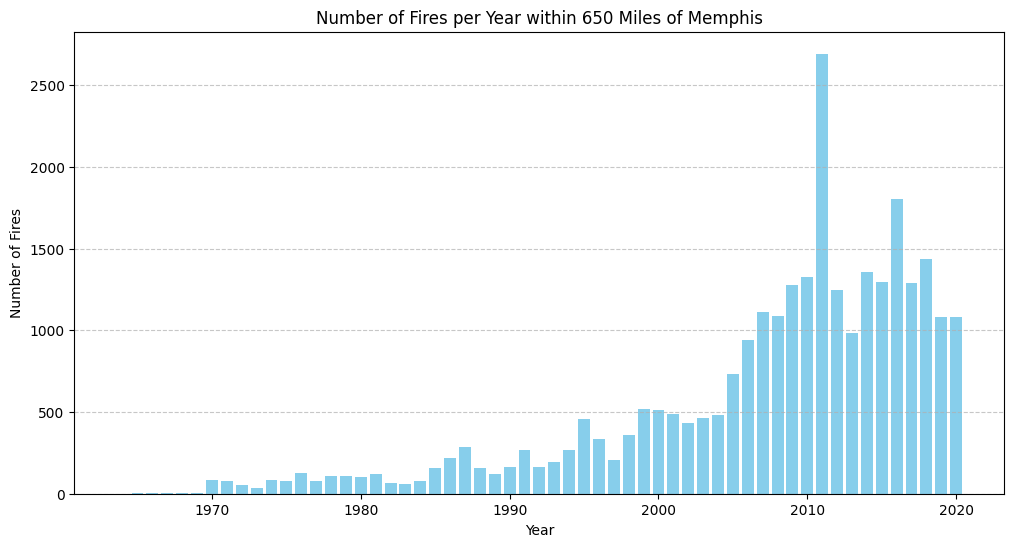

In [ ]:
# # Calculate the number of fires per year within the 650-mile radius of Memphis
fires_per_year_df = si_per_fire_df.groupby('fire_year').size().reset_index(name='num_fires')

# print(fires_per_year_df.head(5))

# Plot the number of fires per year
plt.figure(figsize=(12, 6))
plt.bar(fires_per_year_df['fire_year'], fires_per_year_df['num_fires'], color='skyblue')
plt.title('Number of Fires per Year within 650 Miles of Memphis')
plt.xlabel('Year')
plt.ylabel('Number of Fires')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()